In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
(10 + 8 + 15) / 3

11.0

In [6]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [7]:
ls data

men_shoes.csv  shoes_prices.csv


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)

In [9]:
df.shape

(18280, 48)

In [11]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [12]:
mean_price = np.mean( df['prices_amountmin'])
mean_price

93.53952188183217

In [15]:
[3] * 5

[3, 3, 3, 3, 3]

In [19]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

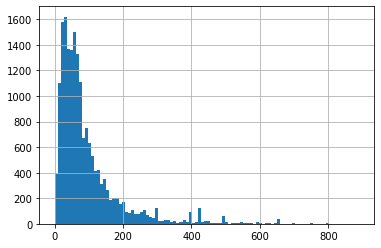

In [20]:
df['prices_amountmin'].hist(bins=100)

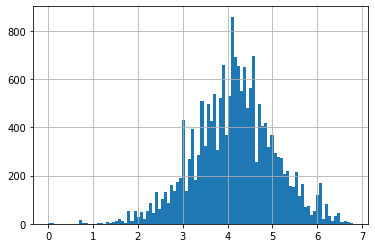

In [21]:
np.log( df['prices_amountmin'] + 1) .hist(bins=100)

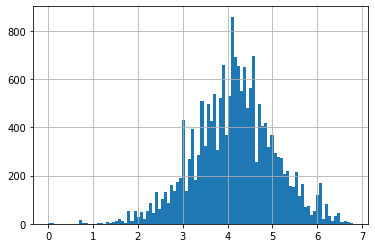

In [23]:
np.log1p( df['prices_amountmin'] ) .hist(bins=100)

In [24]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [25]:
np.median(y_true)

64.95

In [35]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1 ( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [28]:
np.log1p(y_true)

0        3.710886
1        3.970103
2        3.714060
3        3.937886
4        3.855664
           ...   
18275    3.432373
18276    4.188897
18277    3.510948
18278    3.480625
18279    4.290459
Name: prices_amountmin, Length: 18280, dtype: float64

In [31]:
np.mean( np.log1p(y_true) )

4.157759197235119

In [32]:
np.exp (np.mean( np.log1p(y_true) ) ) -1

62.92811169273113

In [34]:
np.expm1 (np.mean( np.log1p(y_true) ) )

62.92811169273113

In [36]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1 ( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [38]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [39]:
df.brand.value_counts()

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
Perman                        1
John Ashford                  1
Croft & Barrow (Kohl's)       1
ACNE Studios                  1
Swims                         1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [66]:
feats1 = ['brand_cat']
x = df[ feats1 ].values
y = df[ 'prices_amountmin' ].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
import sklearn
sklearn.metrics.SCORERS.keys()

In [0]:
def run_model(feats1):
  x = df[ feats1 ].values
  y = df[ 'prices_amountmin' ].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [68]:
run_model (['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [61]:
df.manufacturer.value_counts()

Puma           476
Nike           374
New Balance    249
VANS           170
Reebok         128
              ... 
Marcolin         1
UGG MENS         1
Amer Sports      1
2(x)ist          1
London Fog       1
Name: manufacturer, Length: 618, dtype: int64

In [69]:
feats2 = ['manufacturer_cat']
x = df[ feats2 ].values
y = df[ 'prices_amountmin' ].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-63.133649278023746, 3.394307434888982)

In [0]:
def run_model(feats2):
  x = df[ feats2 ].values
  y = df[ 'prices_amountmin' ].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [72]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [73]:
run_model(['manufacturer_cat', 'brand_cat'])

(-58.53930419908595, 4.311223231615441)

In [74]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [76]:
ls

data/  HelloGithub.ipynb  LICENSE  matrix_one/  README.md


In [77]:
ls matrix_one/

day3.ipynb  day4.ipynb
